In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
data= pd.read_csv("/Users/hi/Desktop/data_science_wbs_school/final_project/twitter_analysis_new/data_usa_cleaned_tokenized.csv")

In [3]:
data 

,content,place,year,month,content_token
0,means moresevere floods hurricanes damage park...,usa,2022,August,"['means', 'moresevere', 'floods', 'hurricanes'..."
1,gadol much lttgtlt,usa,2022,August,"['gadol', 'much', 'lttgtlt']"
2,marshes ponds meadows soak water rains help ke...,usa,2022,August,"['marshes', 'ponds', 'meadows', 'soak', 'water..."
3,parkland helps protect millions americans effe...,usa,2022,August,"['parkland', 'helps', 'protect', 'millions', '..."
4,cooling whats going kill grandmother everyone ...,usa,2022,August,"['cooling', 'whats', 'going', 'kill', 'grandmo..."
...,...,...,...,...,...
82748,csus dean professor take heat study sacramento...,usa,2010,March,"['csus', 'dean', 'professor', 'take', 'heat', ..."
82749,proof lie,usa,2010,March,"['proof', 'lie']"
82750,helping friend doez good english correct essay,usa,2010,March,"['helping', 'friend', 'doez', 'good', 'english..."
82751,panic mode must move nowhere also coffee got c...,usa,2010,March,"['panic', 'mode', 'must', 'move', 'nowhere', '..."


In [4]:
data.dropna(inplace = True)

In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [6]:
data['negative'] = data['content'].astype(str).apply(lambda x:sid.polarity_scores(x)['neg'])
data['neutral'] = data['content'].astype(str).apply(lambda x:sid.polarity_scores(x)['neu'])
data['positive'] = data['content'].astype(str).apply(lambda x:sid.polarity_scores(x)['pos'])
data['compound'] = data['content'].astype(str).apply(lambda x:sid.polarity_scores(x)['compound'])
data

,content,place,year,month,content_token,negative,neutral,positive,compound
0,means moresevere floods hurricanes damage park...,usa,2022,August,"['means', 'moresevere', 'floods', 'hurricanes'...",0.323,0.677,0.000,-0.8225
1,gadol much lttgtlt,usa,2022,August,"['gadol', 'much', 'lttgtlt']",0.000,1.000,0.000,0.0000
2,marshes ponds meadows soak water rains help ke...,usa,2022,August,"['marshes', 'ponds', 'meadows', 'soak', 'water...",0.118,0.694,0.188,0.2500
3,parkland helps protect millions americans effe...,usa,2022,August,"['parkland', 'helps', 'protect', 'millions', '...",0.159,0.612,0.229,0.3182
4,cooling whats going kill grandmother everyone ...,usa,2022,August,"['cooling', 'whats', 'going', 'kill', 'grandmo...",0.220,0.559,0.220,0.0000
...,...,...,...,...,...,...,...,...,...
82748,csus dean professor take heat study sacramento...,usa,2010,March,"['csus', 'dean', 'professor', 'take', 'heat', ...",0.000,1.000,0.000,0.0000
82749,proof lie,usa,2010,March,"['proof', 'lie']",0.000,1.000,0.000,0.0000
82750,helping friend doez good english correct essay,usa,2010,March,"['helping', 'friend', 'doez', 'good', 'english...",0.000,0.325,0.675,0.8074
82751,panic mode must move nowhere also coffee got c...,usa,2010,March,"['panic', 'mode', 'must', 'move', 'nowhere', '...",0.333,0.667,0.000,-0.7184


In [7]:
data['content'][20]

'youre lazy greedy tory theres thing called read'

In [8]:
print(sid.polarity_scores("china highlights economic damage wrought warmingrecord heatwave behind power shortages paralysed industry probably caused scientists"))

{'neg': 0.27, 'neu': 0.73, 'pos': 0.0, 'compound': -0.5859}


In [10]:
data['comp_score'] = data['compound'].apply(lambda c: 'positive' if c > 0.3 else ('negative' if c< -0.3 else 'neutral'))

data.head() 

,content,place,year,month,content_token,negative,neutral,positive,compound,comp_score
0,means moresevere floods hurricanes damage park...,usa,2022,August,"['means', 'moresevere', 'floods', 'hurricanes'...",0.323,0.677,0.000,-0.8225,negative
1,gadol much lttgtlt,usa,2022,August,"['gadol', 'much', 'lttgtlt']",0.000,1.000,0.000,0.0000,neutral
2,marshes ponds meadows soak water rains help ke...,usa,2022,August,"['marshes', 'ponds', 'meadows', 'soak', 'water...",0.118,0.694,0.188,0.2500,neutral
3,parkland helps protect millions americans effe...,usa,2022,August,"['parkland', 'helps', 'protect', 'millions', '...",0.159,0.612,0.229,0.3182,positive
4,cooling whats going kill grandmother everyone ...,usa,2022,August,"['cooling', 'whats', 'going', 'kill', 'grandmo...",0.220,0.559,0.220,0.0000,neutral


In [11]:
data.to_csv("sentiments_usa.csv", index =False)

In [12]:
data['comp_score'].value_counts()

neutral     39720
negative    21998
positive    19241
Name: comp_score, dtype: int64

In [13]:
data

,content,place,year,month,content_token,negative,neutral,positive,compound,comp_score
0,means moresevere floods hurricanes damage park...,usa,2022,August,"['means', 'moresevere', 'floods', 'hurricanes'...",0.323,0.677,0.000,-0.8225,negative
1,gadol much lttgtlt,usa,2022,August,"['gadol', 'much', 'lttgtlt']",0.000,1.000,0.000,0.0000,neutral
2,marshes ponds meadows soak water rains help ke...,usa,2022,August,"['marshes', 'ponds', 'meadows', 'soak', 'water...",0.118,0.694,0.188,0.2500,neutral
3,parkland helps protect millions americans effe...,usa,2022,August,"['parkland', 'helps', 'protect', 'millions', '...",0.159,0.612,0.229,0.3182,positive
4,cooling whats going kill grandmother everyone ...,usa,2022,August,"['cooling', 'whats', 'going', 'kill', 'grandmo...",0.220,0.559,0.220,0.0000,neutral
...,...,...,...,...,...,...,...,...,...,...
82748,csus dean professor take heat study sacramento...,usa,2010,March,"['csus', 'dean', 'professor', 'take', 'heat', ...",0.000,1.000,0.000,0.0000,neutral
82749,proof lie,usa,2010,March,"['proof', 'lie']",0.000,1.000,0.000,0.0000,neutral
82750,helping friend doez good english correct essay,usa,2010,March,"['helping', 'friend', 'doez', 'good', 'english...",0.000,0.325,0.675,0.8074,positive
82751,panic mode must move nowhere also coffee got c...,usa,2010,March,"['panic', 'mode', 'must', 'move', 'nowhere', '...",0.333,0.667,0.000,-0.7184,negative


In [14]:
sentiments = pd.DataFrame(data['comp_score'].value_counts()).reset_index()
sentiments.columns =['sentiment', 'no._of_people']

In [15]:
sentiments

,sentiment,no._of_people
0,neutral,39720
1,negative,21998
2,positive,19241


<AxesSubplot:xlabel='sentiment', ylabel='no._of_people'>

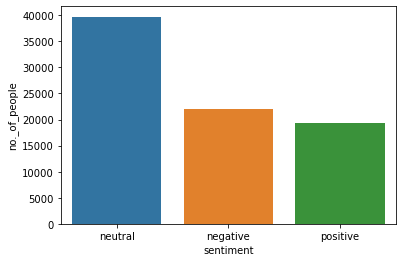

In [16]:
sns.barplot(x='sentiment', y = 'no._of_people', data =sentiments)

In [142]:
s=pd.read_csv("/Users/hi/Desktop/data_science_wbs_school/final_project/sentiments.csv")

In [143]:
s

,Text,Like Count,Text_token,negative,neutral,positive,compound,comp_score
0,climate change scam steal tax money milankovic...,0,"['climate', 'change', 'scam', 'steal', 'tax', ...",0.610,0.325,0.065,-0.9246,negative
1,existing excess carbon dioxide atmosphere lead...,0,"['existing', 'excess', 'carbon', 'dioxide', 'a...",0.136,0.680,0.184,0.0516,neutral
2,2021 report intergovernmental panel droughts i...,5,"['2021', 'report', 'intergovernmental', 'panel...",0.168,0.710,0.123,-0.1779,neutral
3,global climate change turning knowledge action,2,"['global', 'climate', 'change', 'turning', 'kn...",0.000,1.000,0.000,0.0000,neutral
4,behind successful hoax swamp uses effectively ...,1,"['behind', 'successful', 'hoax', 'swamp', 'use...",0.196,0.448,0.356,0.6908,positive
...,...,...,...,...,...,...,...,...
117586,big philanthropy fight fund technologies mitig...,7,"['big', 'philanthropy', 'fight', 'fund', 'tech...",0.103,0.833,0.063,-0.2500,neutral
117587,climate change inaccurate fucking correct say ...,1,"['climate', 'change', 'inaccurate', 'fucking',...",0.243,0.643,0.114,-0.4215,negative
117588,little bit like global warming morphed climate...,0,"['little', 'bit', 'like', 'global', 'warming',...",0.000,0.611,0.389,0.4256,positive
117589,suggest change lifestyle reduce pollution 34 m...,0,"['suggest', 'change', 'lifestyle', 'reduce', '...",0.224,0.701,0.075,-0.4939,negative


In [17]:
# wordcloud for positive tweets
positive = data.query('comp_score == "positive"')
positive

,content,place,year,month,content_token,negative,neutral,positive,compound,comp_score
3,parkland helps protect millions americans effe...,usa,2022,August,"['parkland', 'helps', 'protect', 'millions', '...",0.159,0.612,0.229,0.3182,positive
5,love everyone beats drum year really hot august,usa,2022,August,"['love', 'everyone', 'beats', 'drum', 'year', ...",0.000,0.625,0.375,0.6369,positive
8,like everyone knows talking people believe pol...,usa,2022,August,"['like', 'everyone', 'knows', 'talking', 'peop...",0.000,0.865,0.135,0.3612,positive
14,like every time hear phrase throw another tire...,usa,2022,August,"['like', 'every', 'time', 'hear', 'phrase', 't...",0.000,0.762,0.238,0.3612,positive
15,building new homes wood instead concrete amp s...,usa,2022,August,"['building', 'new', 'homes', 'wood', 'instead'...",0.000,0.812,0.188,0.7579,positive
...,...,...,...,...,...,...,...,...,...,...
82724,opponents states law get boost adam smith,usa,2010,April,"['opponents', 'states', 'law', 'get', 'boost',...",0.000,0.690,0.310,0.4019,positive
82730,feels like im,usa,2010,April,"['feels', 'like', 'im']",0.000,0.444,0.556,0.3612,positive
82735,nelson ahhh excellent watched deniers one sooo...,usa,2010,April,"['nelson', 'ahhh', 'excellent', 'watched', 'de...",0.153,0.365,0.482,0.6705,positive
82742,hail san francisco love,usa,2010,March,"['hail', 'san', 'francisco', 'love']",0.000,0.267,0.733,0.6705,positive


In [153]:
positive['Text'][117582]

'man michelle net ofyam didnt know thought everyone arms global warming thought natural climate change'

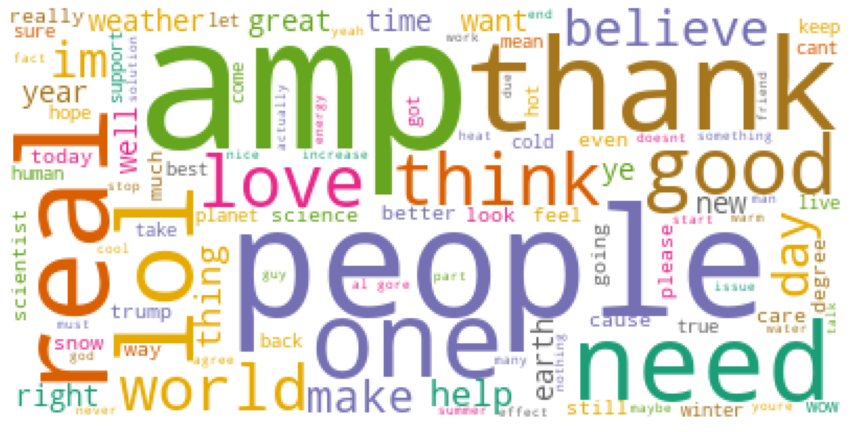

In [18]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ' '.join(list(positive['content'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", colormap='Dark2', max_words=100, contour_width=3)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#wordcloud

In [19]:
negative = data.query('comp_score == "negative"')

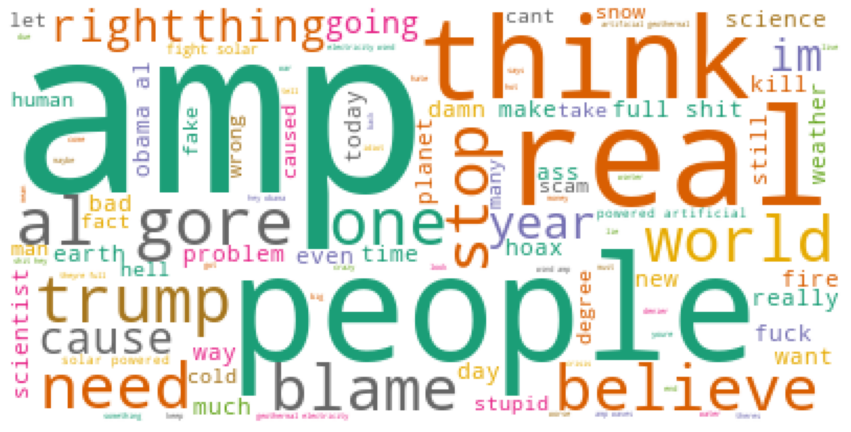

In [20]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ' '.join(list(negative['content'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", colormap='Dark2', max_words=100, contour_width=3)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [22]:
neutral = data.query('comp_score == "neutral"')
neutral

,content,place,year,month,content_token,negative,neutral,positive,compound,comp_score
1,gadol much lttgtlt,usa,2022,August,"['gadol', 'much', 'lttgtlt']",0.000,1.000,0.000,0.0000,neutral
2,marshes ponds meadows soak water rains help ke...,usa,2022,August,"['marshes', 'ponds', 'meadows', 'soak', 'water...",0.118,0.694,0.188,0.2500,neutral
4,cooling whats going kill grandmother everyone ...,usa,2022,August,"['cooling', 'whats', 'going', 'kill', 'grandmo...",0.220,0.559,0.220,0.0000,neutral
6,walker lonnie absolutely nothing 90s summer ti...,usa,2022,August,"['walker', 'lonnie', 'absolutely', 'nothing', ...",0.109,0.743,0.148,0.2006,neutral
7,determining turning ever greener,usa,2022,August,"['determining', 'turning', 'ever', 'greener']",0.000,1.000,0.000,0.0000,neutral
...,...,...,...,...,...,...,...,...,...,...
82746,start spring otherwise known al gore proof bil...,usa,2010,March,"['start', 'spring', 'otherwise', 'known', 'al'...",0.000,1.000,0.000,0.0000,neutral
82747,whoa found wasnt palm sunday church good aceit...,usa,2010,March,"['whoa', 'found', 'wasnt', 'palm', 'sunday', '...",0.144,0.690,0.167,0.1027,neutral
82748,csus dean professor take heat study sacramento...,usa,2010,March,"['csus', 'dean', 'professor', 'take', 'heat', ...",0.000,1.000,0.000,0.0000,neutral
82749,proof lie,usa,2010,March,"['proof', 'lie']",0.000,1.000,0.000,0.0000,neutral


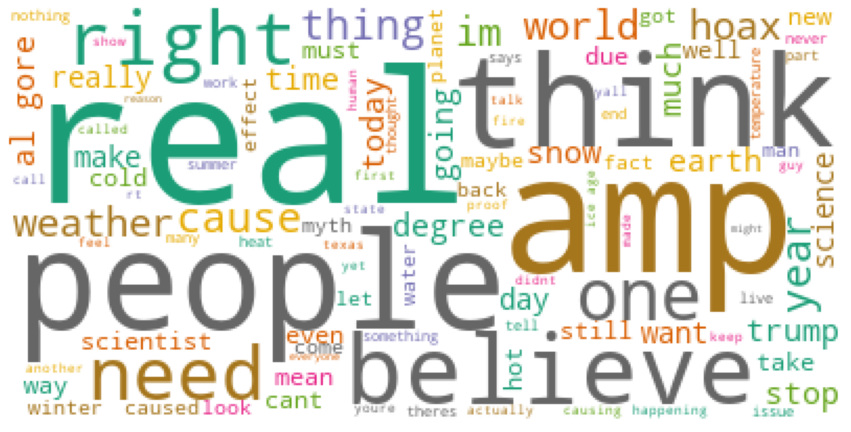

In [23]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ' '.join(list(neutral['content'].astype(str).values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", colormap='Dark2', max_words=100, contour_width=3)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [152]:
data['Text'][117578]

'yall mfs stupid global warming means climate change snowing yes effect global warming'